In [1]:
print("Name: Pooja P Rawool")
print("ERP ID: 1132200081")

Name: Pooja P Rawool
ERP ID: 1132200081


In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
%cd D:\MSC\Trimester3\ML2\Datasets

D:\MSC\Trimester3\ML2\Datasets


In [3]:
data=pd.read_csv("Fish_Missing.csv")

In [4]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555


In [5]:
data.shape

(163, 7)

In [6]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,161.000000,156.000000,151.000000,149.000000,157.000000,151.000000
mean,394.186957,26.559615,28.343709,31.771812,9.097514,4.524421
std,358.367504,9.960151,10.737936,11.546493,4.240064,1.778070
min,0.000000,7.500000,8.400000,8.800000,1.738800,1.047600
25%,120.000000,19.375000,21.000000,23.500000,6.110000,3.525000
50%,272.000000,25.400000,26.500000,30.800000,7.792000,4.322500
75%,650.000000,32.725000,35.500000,39.700000,12.377800,5.789550
max,1650.000000,59.000000,63.400000,68.000000,20.000000,12.000000


# Perform basic EDA

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

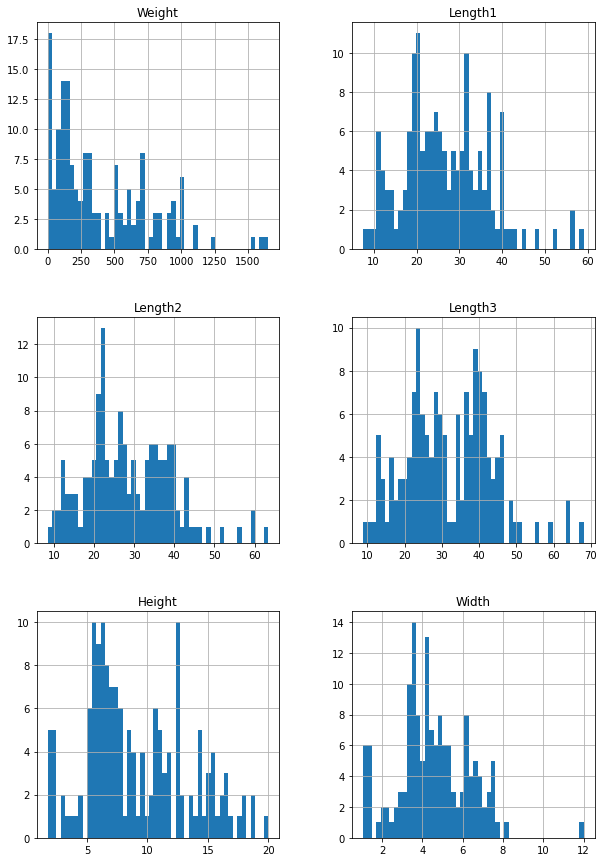

In [7]:
data.hist(bins=50,figsize=(10,15))

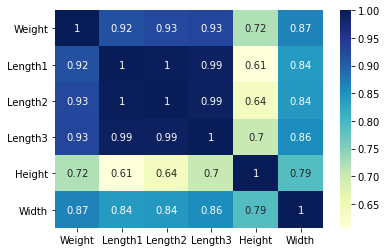

In [8]:
import seaborn as sns
corr_matrix=data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu');

In [9]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

array([[<AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Length1', ylabel='Weight'>,
        <AxesSubplot:xlabel='Length2', ylabel='Weight'>,
        <AxesSubplot:xlabel='Length3', ylabel='Weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='Width', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Weight', ylabel='Length1'>,
        <AxesSubplot:xlabel='Length1', ylabel='Length1'>,
        <AxesSubplot:xlabel='Length2', ylabel='Length1'>,
        <AxesSubplot:xlabel='Length3', ylabel='Length1'>,
        <AxesSubplot:xlabel='Height', ylabel='Length1'>,
        <AxesSubplot:xlabel='Width', ylabel='Length1'>],
       [<AxesSubplot:xlabel='Weight', ylabel='Length2'>,
        <AxesSubplot:xlabel='Length1', ylabel='Length2'>,
        <AxesSubplot:xlabel='Length2', ylabel='Length2'>,
        <AxesSubplot:xlabel='Length3', ylabel='Length2'>,
        <AxesSubplot:xlabel='Height', ylabel='Length2'>,
        <AxesSubplot:xlabel=

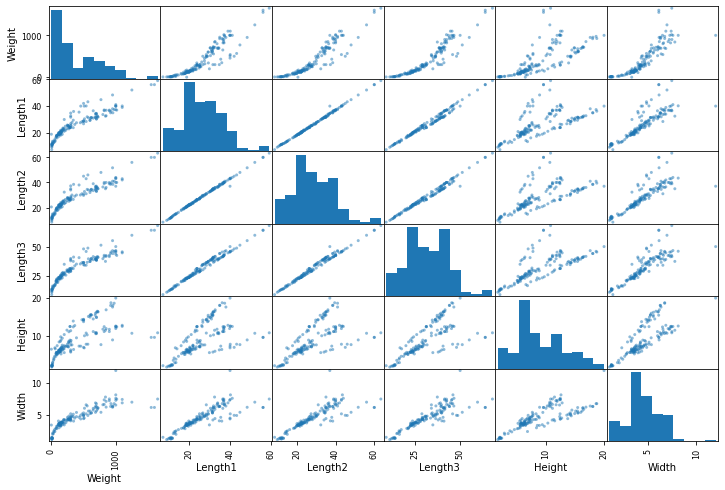

In [10]:
from pandas.plotting import scatter_matrix
attributes = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']
scatter_matrix(data[attributes], figsize=(12, 8))

# Checking for null values

In [11]:
data.isnull().sum()

Species     0
Weight      2
Length1     7
Length2    12
Length3    14
Height      6
Width      12
dtype: int64

<AxesSubplot:>

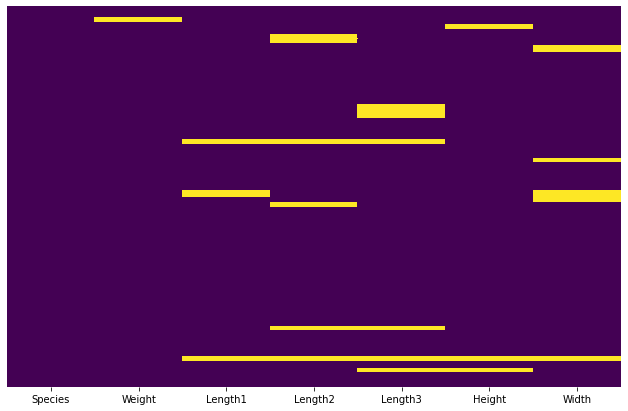

In [12]:
import seaborn as sns
plt.figure(figsize=(11,7))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Accept for species column rest of the columns are containing null values

# Identify columns with single value, if any

In [13]:
data.nunique()

Species      7
Weight     102
Length1    110
Length2     88
Length3    118
Height     149
Width      141
dtype: int64

No columns are present with single value.

# Identify duplicate tuples and remove them, if any

In [14]:
a=data.duplicated()

In [15]:
a

0      False
1      False
2       True
3      False
4      False
       ...  
158    False
159    False
160     True
161    False
162    False
Length: 163, dtype: bool

In [16]:
data.shape

(163, 7)

In [17]:
data[a]

,Species,Weight,Length1,Length2,Length3,Height,Width
2,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
41,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
160,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558


In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.shape

(160, 7)

In [20]:
data.isnull().sum()

Species     0
Weight      2
Length1     7
Length2    12
Length3    14
Height      6
Width      12
dtype: int64

In [21]:
data = data.dropna(subset=["Weight"])

In [22]:
data.isnull().sum()

Species     0
Weight      0
Length1     7
Length2    12
Length3    14
Height      6
Width      12
dtype: int64

In [23]:
data.shape

(158, 7)

In [24]:
y=data["Weight"]
x=data.drop(["Weight","Species"],axis=1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Imputation: Median

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(x_train)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([25.    , 26.15  , 29.7   ,  7.4698,  4.2365])

In [28]:
X_train_imputed = imputer.transform(x_train)

In [29]:
X_test_imputed = imputer.transform(x_test)

In [30]:
X_train_imputed = pd.DataFrame(X_train_imputed, columns=x_train.columns)

In [31]:
X_test_imputed = pd.DataFrame(X_test_imputed, columns=x_test.columns)

In [32]:
X_train_imputed.describe()

,Length1,Length2,Length3,Height,Width
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,26.000794,27.461905,30.964286,8.864749,4.442040
std,9.428455,9.969125,10.690306,4.237891,1.751686
min,7.500000,8.400000,8.800000,1.972000,1.148400
25%,19.500000,21.000000,23.500000,5.965625,3.549600
50%,25.000000,26.150000,29.700000,7.469800,4.236500
75%,31.975000,34.875000,39.225000,11.753400,5.280100
max,59.000000,63.400000,68.000000,20.000000,12.000000


In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train_imputed, y_train)

LinearRegression()

In [34]:
y_pred = regressor.predict(X_test_imputed)

In [35]:
from sklearn import metrics
regressor.score(X_test_imputed,y_test)

0.8559548456486555

# Imputation: Mean

In [36]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy="mean")
imputer1.fit(x_train)

SimpleImputer()

In [37]:
imputer1.statistics_

array([26.05083333, 27.575     , 31.09736842,  8.93449667,  4.46367544])

In [38]:
X_train_imputed1 = imputer1.transform(x_train)

In [39]:
X_test_imputed1 = imputer1.transform(x_test)

In [40]:
X_train_imputed1 = pd.DataFrame(X_train_imputed1, columns=x_train.columns)

In [41]:
X_test_imputed1 = pd.DataFrame(X_test_imputed1, columns=x_test.columns)

In [42]:
X_train_imputed1.describe()

,Length1,Length2,Length3,Height,Width
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,26.050833,27.575000,31.097368,8.934497,4.463675
std,9.425777,9.961621,10.682370,4.226304,1.750406
min,7.500000,8.400000,8.800000,1.972000,1.148400
25%,19.500000,21.000000,23.500000,5.965625,3.549600
50%,25.400000,27.250000,31.097368,7.647800,4.351500
75%,31.975000,34.875000,39.225000,11.753400,5.280100
max,59.000000,63.400000,68.000000,20.000000,12.000000


In [43]:
X_train_imputed1.isnull().sum()

Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train_imputed1, y_train)

LinearRegression()

In [45]:
y_pred = regressor.predict(X_test_imputed1)

In [46]:
from sklearn import metrics
regressor.score(X_test_imputed1,y_test)

0.8536279757891999

# Imputation KNNImputer

In [47]:
from sklearn.impute import KNNImputer
knn_imputer=KNNImputer(n_neighbors=5)
train_imputed=knn_imputer.fit_transform(x_train)
test_imputed=knn_imputer.transform(x_test)

In [48]:
new_train= pd.DataFrame(train_imputed, columns=x_train.columns)
new_test= pd.DataFrame(test_imputed, columns=x_test.columns)

In [49]:
new_train.isnull().sum()

Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [50]:
new_train.describe()

,Length1,Length2,Length3,Height,Width
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,25.870013,27.811667,30.620117,8.889976,4.408493
std,9.542872,10.057399,11.065457,4.341242,1.789815
min,7.500000,8.400000,8.800000,1.972000,1.148400
25%,19.000000,21.000000,22.770000,5.860750,3.413345
50%,25.000000,26.750000,29.350000,7.559800,4.219100
75%,31.975000,34.875000,39.225000,11.931750,5.398215
max,59.000000,63.400000,68.000000,20.000000,12.000000


In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(new_train, y_train)

LinearRegression()

In [52]:
y_pred = regressor.predict(new_test)

In [53]:
from sklearn import metrics
regressor.score(new_test,y_test)

0.8350226999436404

In [ ]:
The best score i.e. 85.5% is obtained by median imputation

In [54]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,151.000000,146.000000,144.00000,152.000000,146.000000
mean,399.208228,26.726490,28.507534,31.93125,9.091380,4.550617
std,359.522386,10.028936,10.820384,11.61728,4.230929,1.783143
min,0.000000,7.500000,8.400000,8.80000,1.738800,1.047600
25%,120.000000,19.600000,21.000000,23.50000,6.110000,3.527250
50%,272.500000,25.400000,26.750000,30.70000,7.789000,4.328750
75%,650.000000,33.250000,36.000000,39.97500,12.038100,5.965125
max,1650.000000,59.000000,63.400000,68.00000,20.000000,12.000000


In [55]:
X_train_imputed.describe()

,Length1,Length2,Length3,Height,Width
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,26.000794,27.461905,30.964286,8.864749,4.442040
std,9.428455,9.969125,10.690306,4.237891,1.751686
min,7.500000,8.400000,8.800000,1.972000,1.148400
25%,19.500000,21.000000,23.500000,5.965625,3.549600
50%,25.000000,26.150000,29.700000,7.469800,4.236500
75%,31.975000,34.875000,39.225000,11.753400,5.280100
max,59.000000,63.400000,68.000000,20.000000,12.000000


In [56]:
X_train_imputed1.describe()

,Length1,Length2,Length3,Height,Width
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,26.050833,27.575000,31.097368,8.934497,4.463675
std,9.425777,9.961621,10.682370,4.226304,1.750406
min,7.500000,8.400000,8.800000,1.972000,1.148400
25%,19.500000,21.000000,23.500000,5.965625,3.549600
50%,25.400000,27.250000,31.097368,7.647800,4.351500
75%,31.975000,34.875000,39.225000,11.753400,5.280100
max,59.000000,63.400000,68.000000,20.000000,12.000000


In [57]:
new_train.describe()

,Length1,Length2,Length3,Height,Width
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,25.870013,27.811667,30.620117,8.889976,4.408493
std,9.542872,10.057399,11.065457,4.341242,1.789815
min,7.500000,8.400000,8.800000,1.972000,1.148400
25%,19.000000,21.000000,22.770000,5.860750,3.413345
50%,25.000000,26.750000,29.350000,7.559800,4.219100
75%,31.975000,34.875000,39.225000,11.931750,5.398215
max,59.000000,63.400000,68.000000,20.000000,12.000000


Imputation using median is giving a good accuracy score as compared to mean since mean consider all the values to calculate the average and also very minute or very large values can affect the mean whereas in the case of median it is not affected by very large or very small values. So in the case of data containing outliers there are chances that the median imputation can give good results as median is robust to outliers and mean is sensitive to outliers.